In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


mobilenetv3small


xception model

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.6394 - loss: 0.6620 - val_accuracy: 0.8379 - val_loss: 0.3719
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 9s/step - accuracy: 0.8032 - loss: 0.4452 - val_accuracy: 0.8972 - val_loss: 0.2832
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 53s 7s/step - accuracy: 0.8950 - loss: 0.2903 - val_accuracy: 0.9170 - val_loss: 0.2465
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.8728 - loss: 0.3183 - val_accuracy: 0.9289 - val_loss: 0.2064
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.8968 - loss: 0.2704 - val_accuracy: 0.9447 - val_loss: 0.1753
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - accuracy: 0.9348 - loss: 0.1771 - val_accuracy: 0.9407 - val_loss: 0.1551
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9583 - loss: 0.1585 - val_accuracy: 0.9486 - val_loss: 0.1391
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.9636 - loss: 0.1422 - val_accuracy: 0.9526 - val_loss: 0.1258
Epoch 9/10
8/8 ━━━━

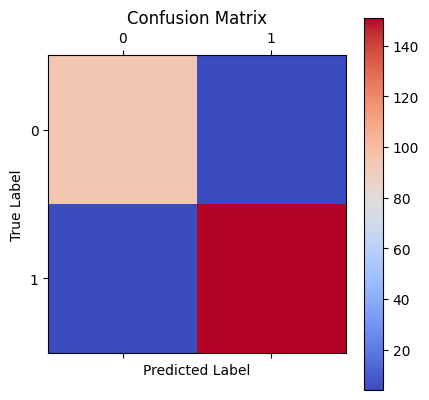

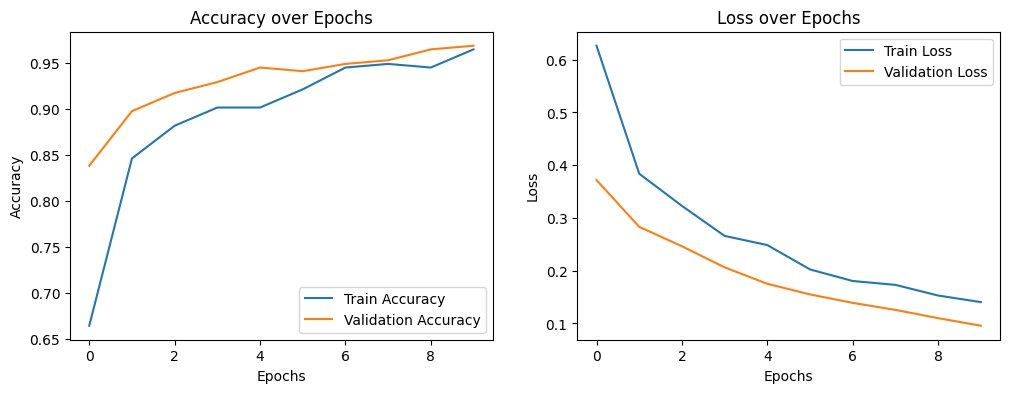

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


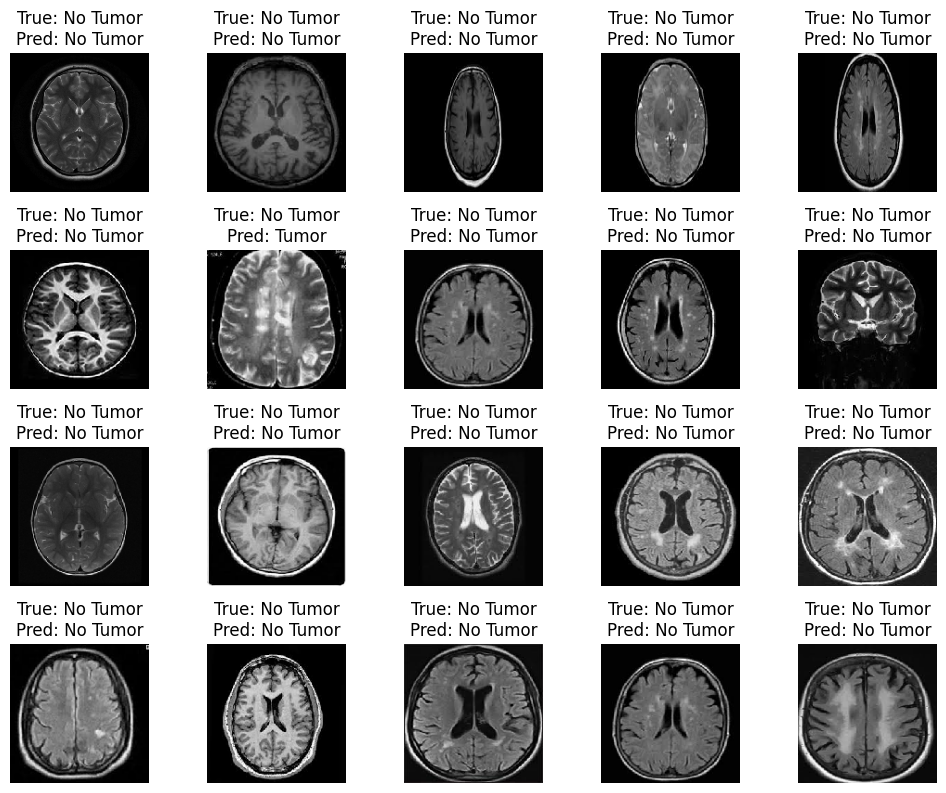

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

# Define image parameters and paths
img_size = 150
batch_size = 32
epochs = 10

train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
val_dir = '/content/drive/MyDrive/dataset/vaildation'

# Image Data Generators for augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

# Define a function to build the Xception model
def build_model():
    base_model = Xception(
        input_shape=(img_size, img_size, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
model = build_model()

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model on the validation data
print("\nEvaluating model on validation data...")
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate the model on the test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Tabulate the results
metrics = [
    ["Accuracy", f"{acc:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]
print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="fancy_grid"))

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Function to display images with predictions in a grid
def plot_images_with_predictions(generator, model, num_images=20):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(sample_images[i])

        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images with predictions
plot_images_with_predictions(test_generator, model, num_images=20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


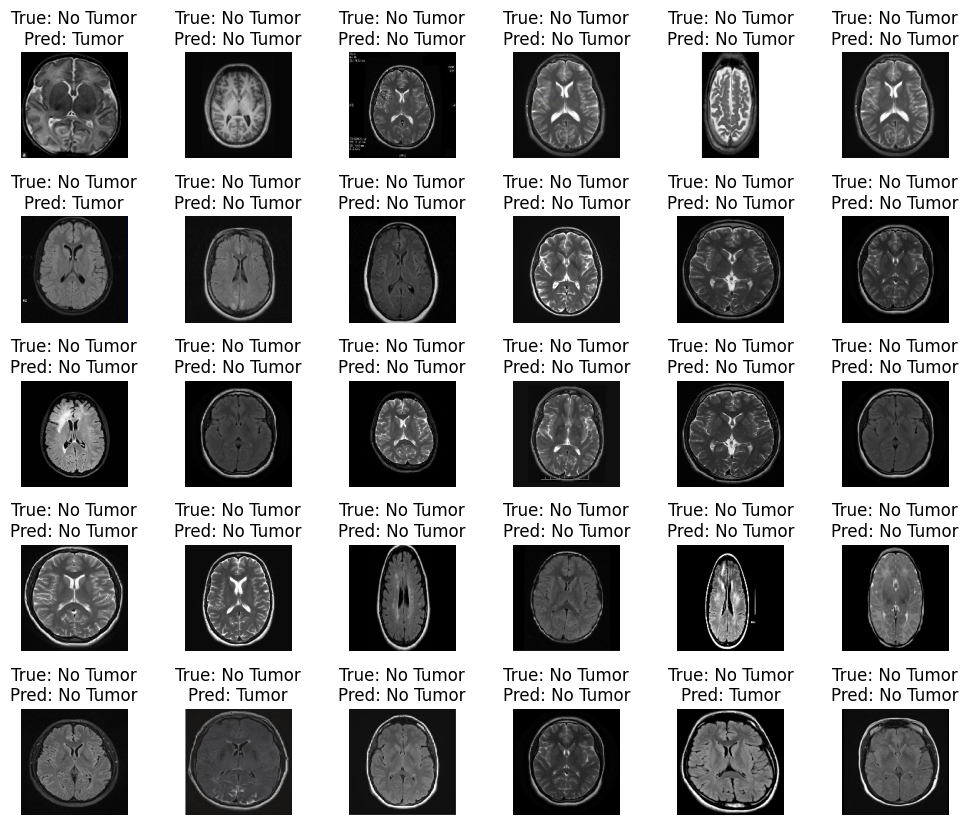

In [25]:
# Function to display images with predictions in a grid
def plot_images_with_predictions(generator, model, num_images=30):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(sample_images[i])

        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images with predictions
plot_images_with_predictions(test_generator, model, num_images=30)

mobilenetv3small without uaing 5 fold

Validation directory found: /content/drive/MyDrive/dataset/vaildation
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6030 - loss: 0.6993 - val_accuracy: 0.3874 - val_loss: 0.6955
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 475ms/step - accuracy: 0.6103 - loss: 0.6539 - val_accuracy: 0.6126 - val_loss: 0.6764
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 882ms/step - accuracy: 0.6234 - loss: 0.7008 - val_accuracy: 0.6166 - val_loss: 0.6683
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.5583 - loss: 0.6918 - val_accuracy: 0.6126 - val_loss: 0.6576
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 931ms/step - accuracy: 0.5749 - loss: 0.6803 - val_accuracy: 0.6126 - val_loss: 0.6593
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 447ms/step - accuracy: 0.6505 - loss: 0.6357 - val_accuracy: 0.6126 - val_loss: 0.6575
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 528ms/step - accuracy: 0.5603 - loss: 0.6794 - val_accuracy: 0.6126 - val_loss: 0.6535
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 589ms/step - accuracy: 0.6080 - loss: 0.6675 - val_accuracy: 0.6126 - val_loss: 0.6547
Epo

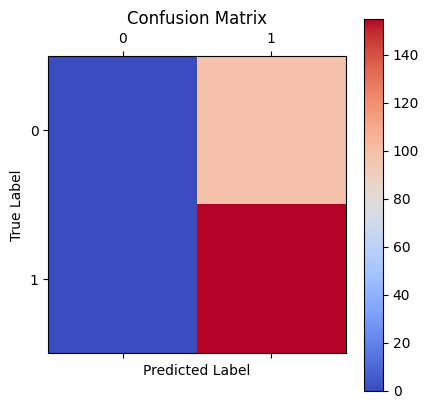

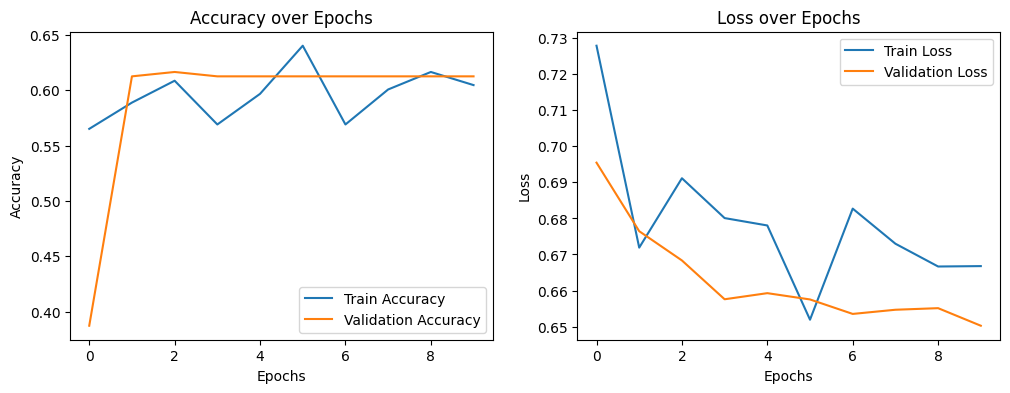

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


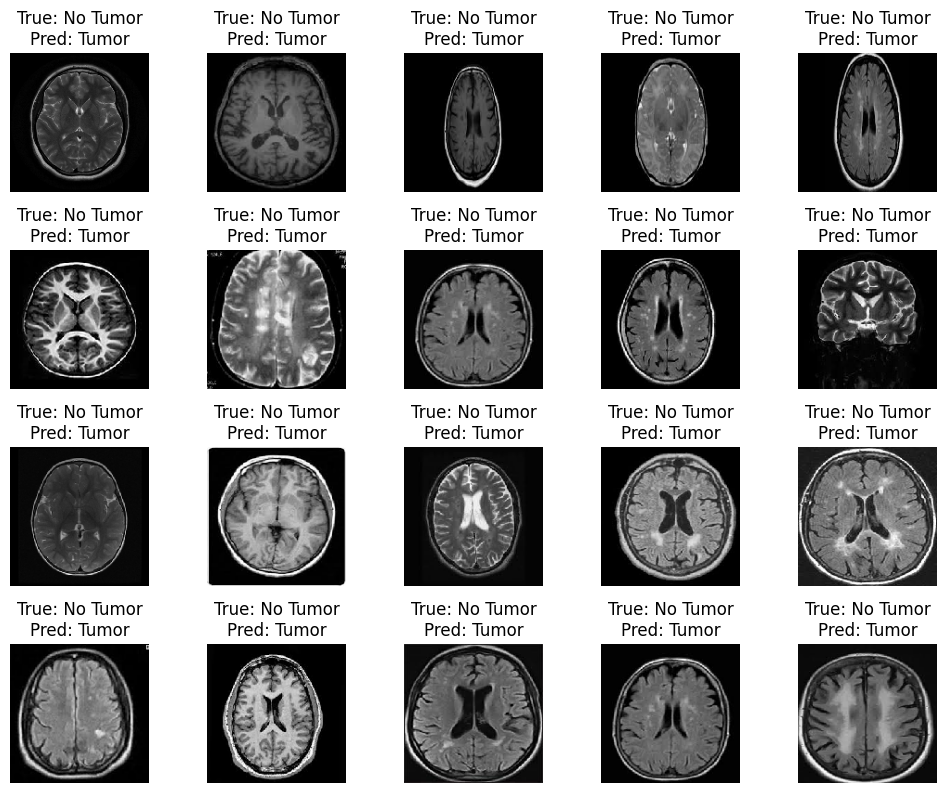

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
import os # Import the os module

# Define image parameters and paths
img_size = 150
batch_size = 32
epochs = 10

train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
val_dir = '/content/drive/MyDrive/dataset/vaildation'  # Check if this directory exists

# Check if the validation directory exists
if not os.path.exists(val_dir):
    print(f"Error: Validation directory not found: {val_dir}")
    # You might need to create this directory or correct the path
    # For example, to create the directory:
    # os.makedirs(val_dir)
else:
    print(f"Validation directory found: {val_dir}")


# Image Data Generators for augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val_dir,  # val_dir is set to '/content/drive/MyDrive/dataset/validation'
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

# Define the MobileNetV3Small model
def build_model():
    base_model = MobileNetV3Small(
        input_shape=(img_size, img_size, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the MobileNetV3Small model
model = build_model()

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model on the test data
print("\nEvaluating the model on test data...")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print metrics in a table format
metrics = [
    ["Accuracy", f"{acc:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]
print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="fancy_grid"))

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Function to display images with predictions in a grid
def plot_images_with_predictions(generator, model, num_images=20):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(sample_images[i])

        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images with predictions
plot_images_with_predictions(test_generator, model, num_images=20)


**VGG19 Model**

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 159s 21s/step - accuracy: 0.6236 - loss: 0.6745 - val_accuracy: 0.6482 - val_loss: 0.5812
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 201s 21s/step - accuracy: 0.6982 - loss: 0.5741 - val_accuracy: 0.8261 - val_loss: 0.5258
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 160s 21s/step - accuracy: 0.7040 - loss: 0.5610 - val_accuracy: 0.7747 - val_loss: 0.4856
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 161s 21s/step - accuracy: 0.7746 - loss: 0.4975 - val_accuracy: 0.8379 - val_loss: 0.4487
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 199s 21s/step - accuracy: 0.8393 - loss: 0.4446 - val_accuracy: 0.8024 - val_loss: 0.4265
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 201s 21s/step - accuracy: 0.7936 - loss: 0.4490 - val_accuracy: 0.8577 - val_loss: 0.4092
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 161s 21s/step - accuracy: 0.8343 - loss: 0.4449 - val_accuracy: 0.8340 - val_loss: 0.

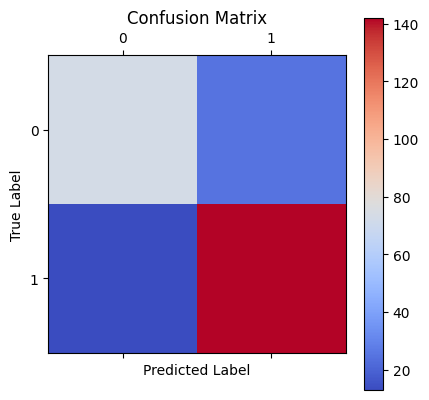

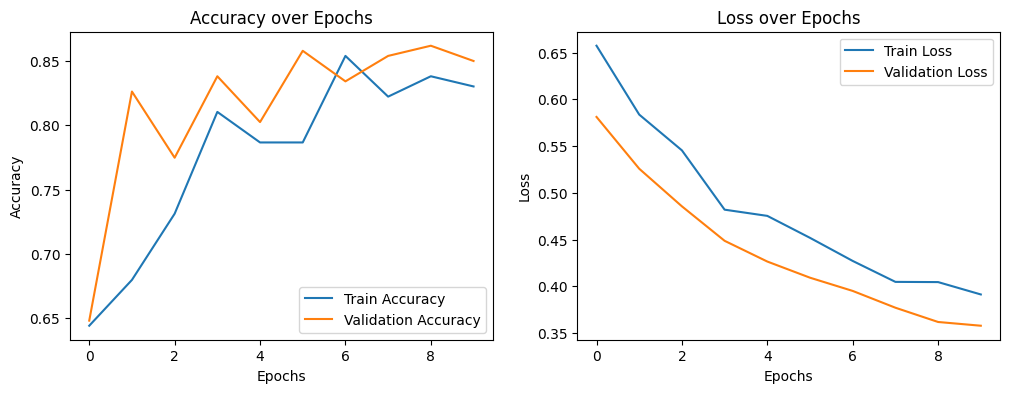

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


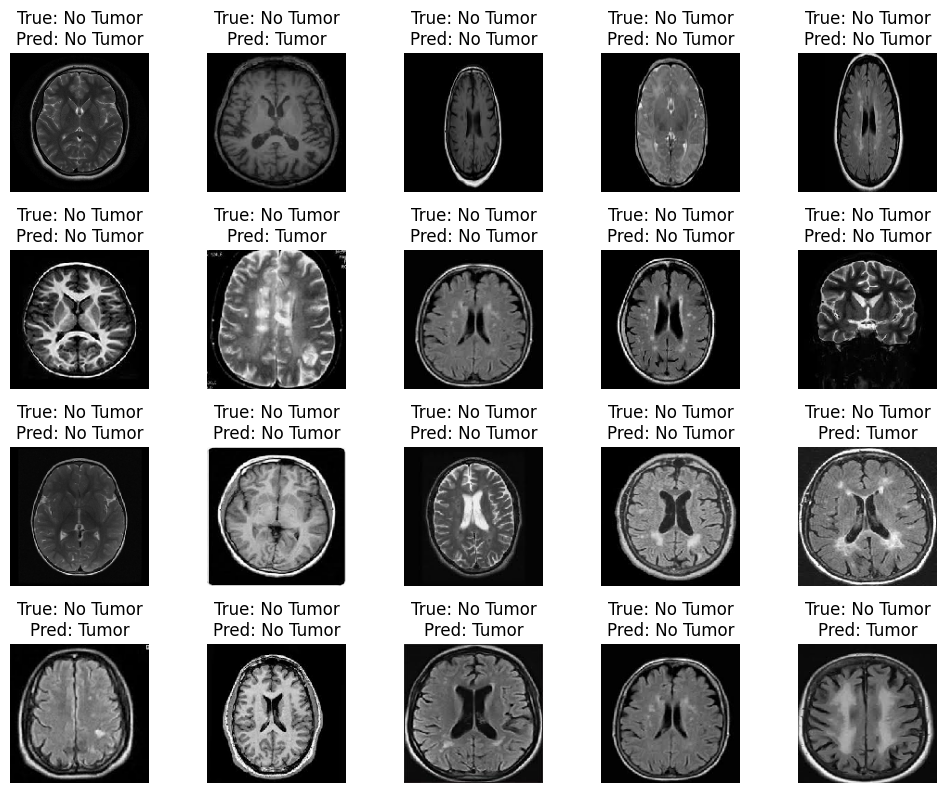

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

# Define image parameters and paths
img_size = 150
batch_size = 32
epochs = 10

train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'
val_dir = '/content/drive/MyDrive/dataset/vaildation'

# Image Data Generators for augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255)

# Load data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

# Define a function to build the VGG19 model
def build_model():
    base_model = VGG19(
        input_shape=(img_size, img_size, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
model = build_model()

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model on the validation data
print("\nEvaluating model on validation data...")
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

# Evaluate the model on the test data
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

# Calculate confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Tabulate the results
metrics = [
    ["Accuracy", f"{acc:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]
print(tabulate(metrics, headers=["Metric", "Score"], tablefmt="fancy_grid"))

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Function to display images with predictions in a grid
def plot_images_with_predictions(generator, model, num_images=20):
    sample_images, sample_labels = next(generator)
    sample_predictions = model.predict(sample_images)

    # Calculate grid size
    grid_size = math.ceil(math.sqrt(num_images))

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i+1)
        plt.imshow(sample_images[i])

        true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
        predicted_label = 'Tumor' if sample_predictions[i] > 0.5 else 'No Tumor'

        plt.title(f'True: {true_label}\nPred: {predicted_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images with predictions
plot_images_with_predictions(test_generator, model, num_images=20)
